In [1]:
import datetime
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from matplotlib import dates as mdates

In [2]:
dt = datetime.datetime.now()
date_str = f"{dt.year:04d}{dt.month:02d}{dt.day:02d}_{dt.hour:02d}{dt.minute:02d}{dt.second:02d}"
date_str

'20251114_042619'

In [3]:
code = "7011"
code

'7011'

In [4]:
path_png = os.path.join("..", "screenshots", f"{date_str}_{code}_marathon.png")
path_png

'../screenshots/20251114_042619_7011_marathon.png'

In [5]:
path_png_2 = os.path.join("..", "screenshots", f"{date_str}_{code}_marathon_corr.png")
path_png_2

'../screenshots/20251114_042619_7011_marathon_corr.png'

In [6]:
file = "result_20251114041845.csv"
path_file = os.path.join("..", "output", file)
path_file

'../output/result_20251114041845.csv'

In [7]:
df = pd.read_csv(path_file, usecols=[1, 2, 3])
df.head()

,ファイル,取引回数,総損益
0,ticks_20250819.xlsx,100,0.0
1,ticks_20250820.xlsx,100,0.0
2,ticks_20250821.xlsx,100,0.0
3,ticks_20250822.xlsx,100,0.0
4,ticks_20250825.xlsx,100,8.0


In [8]:
pattern = re.compile(r"ticks_(\d{4})(\d{2})(\d{2})\.xlsx")

list_index = list()
for file in df["ファイル"]:
    if m := pattern.match(file):
        date_str = f"{m.group(1)}-{m.group(2)}-{m.group(3)}"
    else:
        date_str = "1970-01-01"
    list_index.append(date_str)
df.index = pd.to_datetime(list_index)
df.head()

,ファイル,取引回数,総損益
2025-08-19,ticks_20250819.xlsx,100,0.0
2025-08-20,ticks_20250820.xlsx,100,0.0
2025-08-21,ticks_20250821.xlsx,100,0.0
2025-08-22,ticks_20250822.xlsx,100,0.0
2025-08-25,ticks_20250825.xlsx,100,8.0


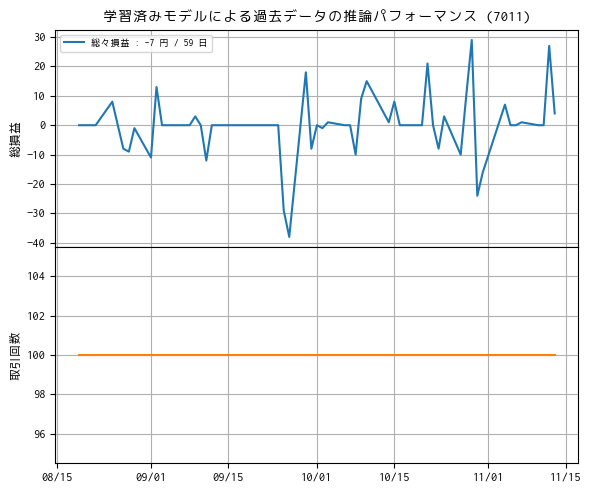

In [9]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

fig = plt.figure(figsize=(6, 5))
n = 2
ax = dict()
gs = fig.add_gridspec(n, 1, wspace=0.0, hspace=0.0, height_ratios=[1 for i in range(n)])
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(
    df["総損益"],
    color="C0",
    label=f"総々損益 : {df["総損益"].sum():,.0f} 円 / {len(df)} 日",
)
ax[0].set_ylabel("総損益")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax[0].legend(fontsize=7)
ax[0].set_title(f"学習済みモデルによる過去データの推論パフォーマンス ({code})")

ax[1].plot(df["取引回数"], color="C1")
ax[1].set_ylabel("取引回数")
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))

plt.tight_layout()
plt.savefig(path_png)
plt.show()

In [10]:
df["総損益"].values

array([  0.,   0.,   0.,   0.,   8.,   0.,  -8.,  -9.,  -1., -11.,  13.,
         0.,   0.,   0.,   0.,   3.,   0., -12.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., -29., -38.,  18.,  -8.,   0.,  -1.,   1.,   0.,
         0., -10.,   9.,  15.,   1.,   8.,   0.,   0.,   0.,  21.,   0.,
        -8.,   3., -10.,  10.,  29., -24., -16.,   7.,   0.,   0.,   1.,
         0.,   0.,  27.,   4.])

In [11]:
df_corr = df[["取引回数", "総損益"]].corr()
corr = df_corr.iloc[0, 1]
corr

np.float64(nan)

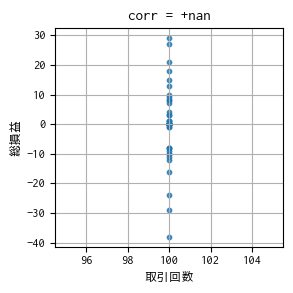

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.regplot(
    data=df,
    x="取引回数",
    y="総損益",
    scatter_kws={"s": 10},
    line_kws={"linewidth": 1},
    ax=ax,
)

ax.set_xlabel("取引回数")
ax.set_ylabel("総損益")
ax.set_title(f"corr = {corr:+.3f}")
ax.grid()

plt.tight_layout()
plt.savefig(path_png_2)
plt.show()